Regresion lineal

In [2]:
import pandas as pd
import numpy as np
dat_csv  = pd.read_csv('datos4.csv', encoding = "ISO-8859-1")
datos_x = dat_csv.x
datos_y = dat_csv.y
x = []
y = []
for i in dat_csv.x:
    x.append(i)
for j in dat_csv.y:
    y.append(j)
print(x)    
print(y)

X = np.array(x)
Y = np.array(y)

[1.81, 2.58, 3.26, 4.27, 5.89, 6.42, 7.62, 8.82, 9.05, 10.66, 11.11, 12.11, 13.95, 14.97, 15.08, 16.06, 17.57, 18.45, 19.7, 20.37]
[13.16, 24.56, 37.0, 48.86, 60.63, 72.68, 84.99, 96.54, 108.85, 121.18, 133.0, 144.63, 157.07, 168.92, 180.71, 193.04, 204.39, 217.12, 228.72, 241.29]


In [3]:
# Creando datos de entrenamiento
X,Y
datos_entrenamiento = int(0.8 * len(X))
datos_prueba = len(X) - datos_entrenamiento

#ENTRENAMIENTO
X_entrenamiento = X[:datos_entrenamiento].reshape((datos_entrenamiento,1))
print(X_entrenamiento)
Y_entrenamiento = Y[:datos_entrenamiento].reshape((datos_entrenamiento,1))
print(Y_entrenamiento)
#PRUEBA
X_prueba = X[datos_entrenamiento:].reshape((datos_prueba,1))
Y_prueba = Y[datos_entrenamiento:].reshape((datos_prueba,1))

[[ 1.81]
 [ 2.58]
 [ 3.26]
 [ 4.27]
 [ 5.89]
 [ 6.42]
 [ 7.62]
 [ 8.82]
 [ 9.05]
 [10.66]
 [11.11]
 [12.11]
 [13.95]
 [14.97]
 [15.08]
 [16.06]]
[[ 13.16]
 [ 24.56]
 [ 37.  ]
 [ 48.86]
 [ 60.63]
 [ 72.68]
 [ 84.99]
 [ 96.54]
 [108.85]
 [121.18]
 [133.  ]
 [144.63]
 [157.07]
 [168.92]
 [180.71]
 [193.04]]


<function matplotlib.pyplot.show(close=None, block=None)>

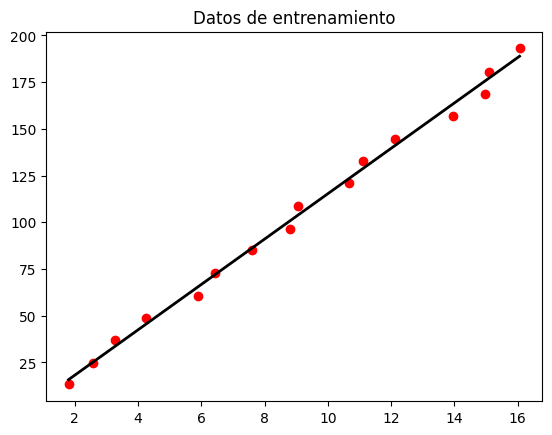

In [4]:
# Regresion lineal
from sklearn import linear_model
import matplotlib.pyplot as plt

# Creamos un objeto de regresión lineal
linear_regressor = linear_model.LinearRegression()

# Ajustamos la regresión a los datos de entrenamiento
linear_regressor.fit(X_entrenamiento, Y_entrenamiento)

# Y a partir de datos de regresión encontrados
Y_predicha_de_entrenamiento = linear_regressor.predict(X_entrenamiento)

plt.figure()
plt.scatter(X_entrenamiento, Y_entrenamiento, color='red')
plt.plot(X_entrenamiento, Y_predicha_de_entrenamiento, color='black', linewidth=2)
plt.title('Datos de entrenamiento')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

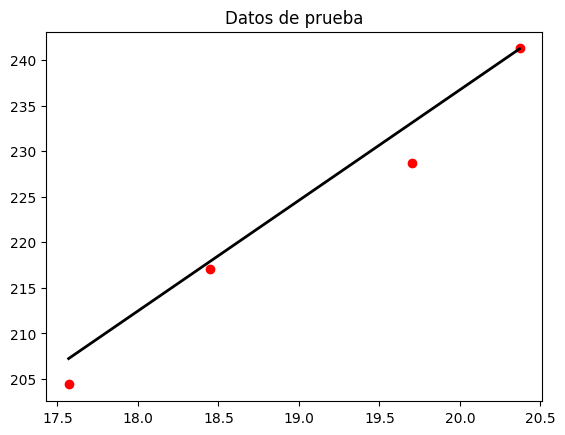

In [5]:
# Realizamos la X_prueba
Y_predicha_de_prueba = linear_regressor.predict(X_prueba)
plt.figure()
plt.scatter(X_prueba, Y_prueba, color='red')
plt.plot(X_prueba, Y_predicha_de_prueba, color='black', linewidth=2)
plt.title('Datos de prueba')
plt.show

In [6]:
# Evaluamos las metricas de Scikit-learn
import sklearn.metrics as sm
print("Error absoluto medio =", round(sm.mean_absolute_error(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Error cuadratico medio =", round(sm.mean_squared_error(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Error absoluto mediano =", round(sm.median_absolute_error(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Puntuación de varianza explicada =", round(sm.explained_variance_score(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Puntuación R2 =", round(sm.r2_score(Y_prueba, Y_predicha_de_prueba), 2))

Error absoluto medio = 2.02
Error cuadratico medio = 7.01
Error absoluto mediano = 1.83
Puntuación de varianza explicada = 0.98
Puntuación R2 = 0.96


In [7]:
# Regresion contraida
from sklearn import linear_model
regresion_ridge = linear_model.Ridge(alpha=0.01, fit_intercept=True, max_iter=10000)
regresion_ridge.fit(X_prueba, Y_prueba)

Y_predicha_de_prueba = regresion_ridge.predict(X_prueba)


print("Error absoluto medio =", round(sm.mean_absolute_error(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Error cuadratico medio =", round(sm.mean_squared_error(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Puntuación de varianza explicada =", round(sm.explained_variance_score(Y_prueba, Y_predicha_de_prueba), 2)) 
print("Puntuación R2 =", round(sm.r2_score(Y_prueba, Y_predicha_de_prueba), 2))

Error absoluto medio = 1.49
Error cuadratico medio = 2.86
Puntuación de varianza explicada = 0.98
Puntuación R2 = 0.98


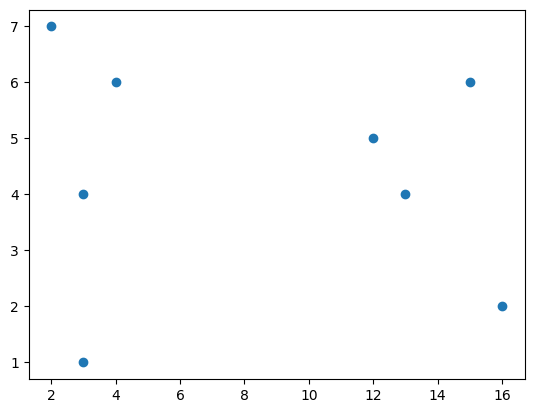

In [8]:
# Regresion Logistica
# PASO 1
import numpy as np
from sklearn import linear_model 
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X = np.array([[16,2], [3,1], [2,7], [13,4], [3,4], [12,5], [15,6], [4,6]])
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.show()

In [9]:
# PASO 2 - Agrupar
Y = [1, 0, 0, 1, 0, 1, 1, 0]
clase0 = np.array([X[i] for i in range(len(X)) if Y[i]==0])
clase1 = np.array([X[i] for i in range(len(X)) if Y[i]==1])
print("Clase0: ", clase0)
print("Clase1: ", clase1)

Clase0:  [[3 1]
 [2 7]
 [3 4]
 [4 6]]
Clase1:  [[16  2]
 [13  4]
 [12  5]
 [15  6]]


In [10]:
# PASO 3 - Clasificador
clasificador = linear_model.LogisticRegression(solver='lbfgs', C=100)
clasificador.fit(X, Y)

LogisticRegression(C=100)

In [11]:
# PASO4 - Prediccion
prediccion = clasificador.predict(X)
print(prediccion)

print(clasificador.score(X,Y))

[1 0 0 1 0 1 1 0]
1.0


In [12]:
# PASO 5 - Clasificacion de prueba
Xn = np.array([[6,4], [20,7], [4,17]])
Yn = clasificador.predict(Xn)
print(Yn)

[0 1 0]


In [13]:
# PASO 6 - Modelo + Test
Xs = np.concatenate((X, Xn), axis=0)
Ys = np.append(Y , Yn)

x_min, x_max = min(Xs[:, 0]) - 1.0, max(Xs[:, 0]) + 1.0
y_min, y_max = min(Xs[:, 1]) - 1.0, max(Xs[:, 1]) + 1.0

print(Xs)
print(Xs[:, 0])
print(Xs[:, 1])

[[16  2]
 [ 3  1]
 [ 2  7]
 [13  4]
 [ 3  4]
 [12  5]
 [15  6]
 [ 4  6]
 [ 6  4]
 [20  7]
 [ 4 17]]
[16  3  2 13  3 12 15  4  6 20  4]
[ 2  1  7  4  4  5  6  6  4  7 17]


In [14]:
# PASO 7 - Creamos la malla meshgrid()
step_size = 0.01

valor_x, valor_y = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

malla_de_puntos = clasificador.predict(np.c_[valor_x.ravel(), valor_y.ravel()])

In [15]:
x=[1, 2, 3]
y=[4, 5, 6]
np.c_[x, y]

array([[1, 4],
       [2, 5],
       [3, 6]])

(1800, 2000)


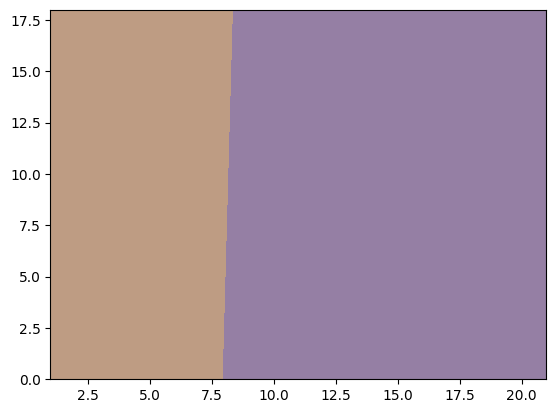

In [20]:
# PASO 8 - Creamos mapa color pcolormesh()
malla_de_puntos = malla_de_puntos.reshape(valor_x.shape)
plt.figure()
plt.pcolormesh(valor_x, valor_y, malla_de_puntos, cmap=plt.cm.PuOr, alpha=0.5)
print(valor_x.shape)

[[  0.     31.875  63.75 ]
 [ 95.625 127.5   159.375]
 [191.25  223.125 255.   ]]


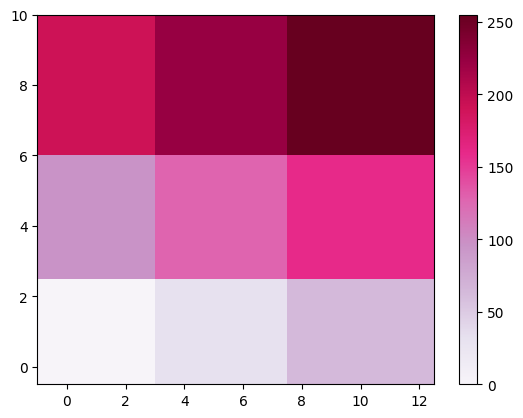

In [17]:
x = np.array([1, 5, 10])
y = np.array([1, 4, 8])
z = np.linspace(0, 255, 9).reshape(3, 3)
print(z)
plt.pcolormesh(x, y, z, cmap = "PuRd");
plt.colorbar();

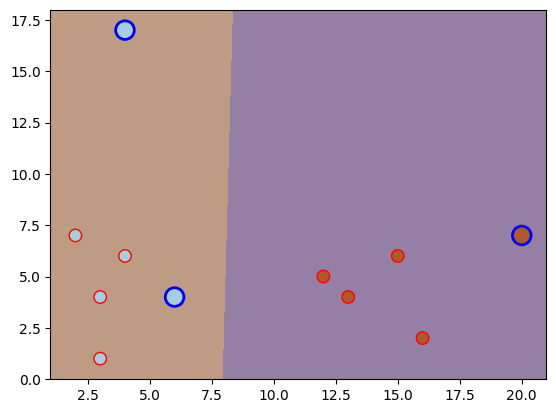

In [24]:
# PASO 9 - Ponemos los puntos sobre el grafico de malla
malla_de_puntos = malla_de_puntos.reshape(valor_x.shape)
plt.figure()
plt.pcolormesh(valor_x, valor_y, malla_de_puntos, cmap=plt.cm.PuOr, alpha=0.5)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=80, edgecolors='red', linewidth=1, cmap=plt.cm.Paired)
plt.scatter(Xn[:, 0], Xn[:, 1], c=clasificador.predict(Xn), s=180, edgecolors='blue', linewidth=2, cmap=plt.cm.Paired)

plt.show()